In [1]:
import pymongo

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import plotly

In [5]:
from pandas import DataFrame, Series

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib

Using matplotlib backend: TkAgg


In [8]:
client = pymongo.MongoClient('localhost', 27017)

In [9]:
scraping = client['scraping']

In [10]:
data = scraping['data_sample']

In [11]:
for i in data.find({}, {'_id': 0, 'area': 1}).limit(10):
    print(i['area'][0])

朝阳
朝阳
西城
朝阳
丰台
朝阳
不明
朝阳
朝阳
东城


In [12]:
fig = plt.figure()
# matplotlib 的图像都位于Figure中， 可以使用plt.figure 创建一个新的Figure

In [23]:
# 不能通过空的figure来绘图， 必须使用add_subplot 创建一个或多个subplot才行

In [13]:
ax1 = fig.add_subplot(2, 2, 1 )

In [14]:
ax2 = fig.add_subplot(2, 2, 2)

In [15]:
ax3 = fig.add_subplot(2, 2, 3)

In [16]:
plt.plot(np.arange(10))

In [17]:
plt.show()

In [18]:
from numpy.random import randn

In [19]:
plt.plot(randn(50).cumsum(), 'k--')
# ‘k--' 表示黑色虚线图

In [20]:
plt.show()

In [21]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [22]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [28]:
# plt.subplot 创建一个新的Figure， 并返回一个含有已创建的subplot对象的numpy数组

In [25]:
fig, axes = plt.subplots(2, 3)

In [26]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96ec100710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f96e404b2b0>]], dtype=object)

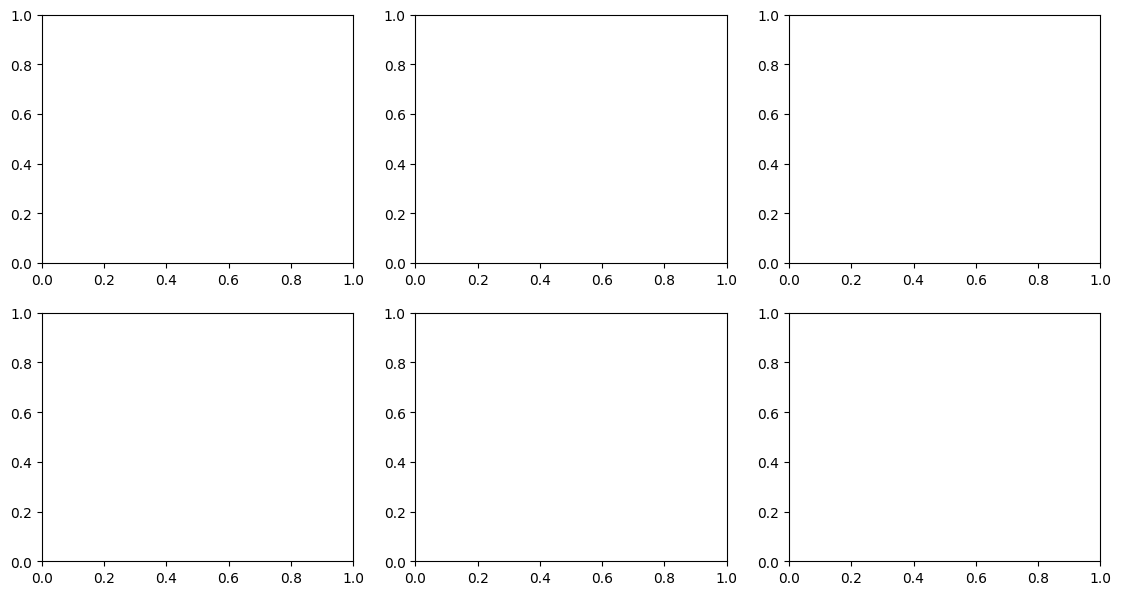

In [27]:
fig

In [29]:
# 可以对axes数组进行索引

In [30]:
# 调整subplot周围的间距

In [32]:
# subplots_adjust(left=None, bottom=None, top=None, wspace=None, hspace=None)

In [33]:
# wspace and hspace 用于控制宽度和高度的百分比， 可以看做suplot之间的间距

In [35]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [36]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

In [37]:
plt.subplots_adjust(wspace=0, hspace=0)

In [59]:
fig, axes = plt.subplots(sharex=True, sharey=True)

In [69]:
axes.hist(np.array([i['area'][0] for i in data.find({}, {'_id': 0, 'area': 1}).limit(10)]), bins=100, color='k', alpha=0.5)

TypeError: cannot perform reduce with flexible type

In [67]:
np.array([i['area'][0] for i in data.find({}, {'_id': 0, 'area': 1}).limit(10)])

array(['朝阳', '朝阳', '西城', '朝阳', '丰台', '朝阳', '不明', '朝阳', '朝阳', '东城'], 
      dtype='<U2')

In [43]:
# 颜色 标记 线型

In [46]:
plt.plot(randn(30).cumsum(), 'ko--')

In [48]:
# 更为明确的方式
# plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='0')

In [60]:
d = randn(30).cumsum()

In [61]:
plt.plot(d, 'k--', label='Default')

In [62]:
plt.plot(d, 'k-', drawstyle='steps-post', label='steps-post')

In [64]:
plt.legend(loc='best')
# 图例的位置

In [65]:
# 刻度 标签 图例

In [66]:
d

array([-1.36062503,  0.20736037, -1.50563958, -1.22457317, -3.79555305,
       -4.20245607, -4.75628655, -2.30757935, -2.67597594, -4.38986535,
       -6.00230991, -5.54628932, -4.08990957, -4.28123037, -4.31421607,
       -3.67483489, -3.56434271, -3.22886292, -2.88016324, -3.46509493,
       -3.39696341, -3.03005387, -2.66819305, -3.57598462, -6.45108226,
       -7.83565363, -7.39246648, -8.0857555 , -8.13640971, -6.40248815])

In [70]:
fig = plt.figure()

In [71]:
ax = fig.add_subplot(1, 1, 1)

In [72]:
ax.plot(randn(1000).cumsum())

In [73]:
# 修改x轴的刻度

In [74]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [75]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [76]:
ax.set_title('My first matplotlib plot')

In [77]:
ax.set_xlabel('Stages')

In [78]:
# 修改y轴类似

In [79]:
# 添加图例

In [80]:
fig = plt.figure()

In [81]:
ax = fig.add_subplot(1, 1, 1)

In [82]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [83]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [84]:
ax.plot(randn(1000).cumsum(), 'k', label='three')

In [85]:
ax.legend(loc='best')

In [86]:
# 注解 subplot上绘图

In [87]:
from datetime import datetime

In [88]:
fig = plt.figure()

In [90]:
ax = fig.add_subplot(1, 1, 1)

In [91]:
da = pd.read_csv('/home/jasd/python/pydata-book/ch08/spx.csv', index_col = 0, parse_dates=True)